In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras  

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


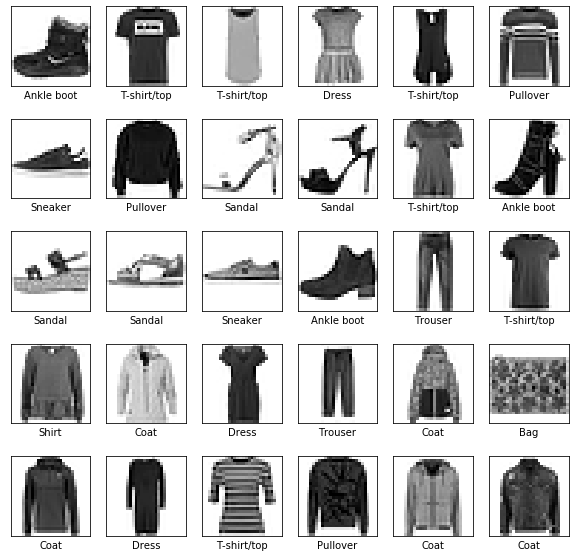

In [4]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    

In [5]:
# apply normalization
X_train= X_train / 255

In [6]:
model=keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(360,activation=tf.nn.relu),
    keras.layers.Dense(120,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4755 - accuracy: 0.8268
Epoch 2/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3637 - accuracy: 0.8660
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3262 - accuracy: 0.8796
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3028 - accuracy: 0.8878
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.8929
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2698 - accuracy: 0.8990
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9031


In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 46.8919 - accuracy: 0.8720


[46.89190673828125, 0.871999979019165]

In [10]:
#prediction
predict=model.predict(X_test)
print(predict[0])
print(np.argmax(predict[0]))
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
9


In [11]:
def plot_image(i,prediction,true_label,image):
    prediction,true_label,image=prediction[i],true_label[i],image[i]
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image)
    predict_label=np.argmax(prediction)
    if(predict_label == true_label):
        color='blue'
    else:
        color='red'
    
    plt.xlabel("predict :{}  & True :({})".format(class_names[predict_label],
                             class_names[true_label]),
                            color=color)
        
    

In [12]:
def plot_bar(i,prediction,true_label):
    prediction,true_label=prediction[i],true_label[i]
    lists=range(10)
    plt.xticks(lists)
    plt.yticks([])
    
    plot=plt.bar(range(10),prediction)
    
    predict_label=np.argmax(prediction)
    plot[predict_label].set_color('red')
    plot[true_label].set_color('blue')

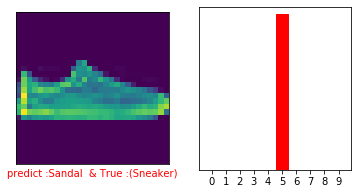

In [13]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predict, y_test, X_test)
plt.subplot(1,2,2)
plot_bar(i, predict, y_test)
plt.show()

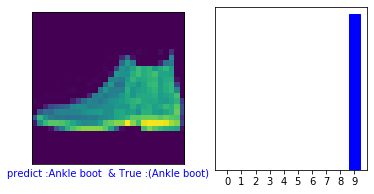

In [14]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predict, y_test, X_test)
plt.subplot(1,2,2)
plot_bar(i, predict, y_test)


In [15]:
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

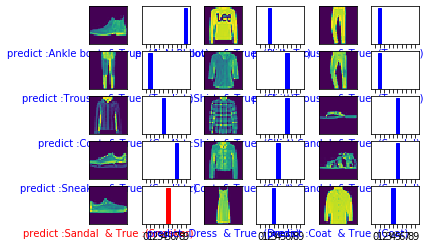

In [16]:
for i in range(15):
    plt.subplot(5, 6,2*i+1)
    plot_image(i, predict, y_test, X_test)
    plt.subplot(5, 6, 2*i+2)
    plot_bar(i, predict, y_test)
plt.show()
